# Assignment 6 - Are there fragile regions in the human genome?

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np

import Assignment6_helper 

from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
# This is not relevant to most people because I recommended you use my server, but
# change home to where you are storing everything. Again. Not recommended.

**Problem 1**: Simulating reversals

Below is a simulation that cuts the chromosome into blocks. It produces 2N+1 blocks (N=320) each iteration. For this problem, I would like you to write a function that carries out this experiment once and then modify my code to call this function. This is not autograded.

In [2]:
ngenes = 25000
chromosome = ["g%d"%i for i in range(ngenes)]
pd.Series(chromosome)

0            g0
1            g1
2            g2
3            g3
4            g4
          ...  
24995    g24995
24996    g24996
24997    g24997
24998    g24998
24999    g24999
Length: 25000, dtype: object

In [3]:
%matplotlib inline 
import random
import numpy as np
random.seed(0)
random_reversals = 320

bins = [0. ,  27.8,  55.6,  83.4, 111.2, 139. , 166.8, 194.6, 222.4, 250.2, 278.]
lens = [] # FILLING THIS OUT WITH THE LENGTHS OF YOUR BLOCKS IS WHAT AUTOGRADER NEEDS
niters = 1000
counts = np.zeros((niters,len(bins)-1))
means = []
lengths = []
for iteration in range(niters):
    cuts = []
    for rev_i in range(random_reversals):
        i = random.randint(0,len(chromosome))
        j = random.randint(0,len(chromosome))
        if i > j:
            i,j = j,i
        cuts.extend([i,j])
    cuts = np.sort(cuts)
    blocks = []
    lens = []
    prev_loc = 0
    for i in range(len(cuts)):
        blocks.append([prev_loc,cuts[i]])
        lens.append(cuts[i]-prev_loc)
        prev_loc = cuts[i]
    lens.append(len(chromosome) - prev_loc)
    blocks.append([prev_loc,len(chromosome)])
    means.append(np.mean(lens))
    lengths.append(len(lens))
    counts[iteration,:],centers = np.histogram(lens,bins=bins)

counts,centers = np.histogram(lens,bins=bins)
counts

array([340, 157,  61,  40,  19,  15,   4,   1,   2,   1])

**Exercise 2**: Greedy heuristic for sorting by reversals

For this exercise, I want you to implement the greedy heuristic as described here and in Chapter 6. 

Input: $P$ - signed permutation (pandas Series object)

Output: $d_{rev}(P)$ - number of reversals

In [4]:
P_list = [1,-7,6,-10,9,-8,2,-11,-3,5,4]
P = pd.Series(P_list,index=list(range(1,len(P_list)+1)))

Assignment6_helper.greedy_sorting(P)

11

**Exercise 3**: Number of breakpoints problem

For this exercise, I want you to find the number of breakpoints in a permutation. 

Input: $P$ - signed permutation (pandas Series object)

Output: Number of breakpoints in this permutation

In [5]:
P_list2 = [3,4,5,-12,-8,-7,-6,1,2,10,9,-11,13,14]
P2 = pd.Series(P_list2,index=list(range(1,len(P_list2)+1)))
nbreakpoints_P2 = Assignment6_helper.count_breakpoints(P2)
P_list3 = [3,4,5,-12,-8,-7,-6,1,2,10,9,-11,14,13]
P3 = pd.Series(P_list3,index=list(range(1,len(P_list2)+1)))
nbreakpoints_P3 = Assignment6_helper.count_breakpoints(P3)
nbreakpoints_P2,nbreakpoints_P3

(8, 10)

**Exercise 4**: Representing a graph

For this exercise, I want you to adopt a specific format for representing the genome graphs. We can't easily construct the arrow (directed and undirected), but we can come up with a straightforward way to represent it.

Input: genome - a list of signed permutation (pandas Series objects)

Output: A networkx graph

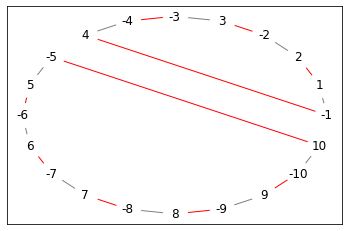

In [6]:
G = Assignment6_helper.genome_to_graph([pd.Series([1,-2,-3,4]),pd.Series([5,6,7,8,9,10])])
Assignment6_helper.show(G)

**Exercise 5**: Creating a breakpoint graph

For this exercise, I want you to construct a breakpoint graph. Again, I use a slightly different notation than the one in the book, but the results are the same.

Input: two genomes where a genome is a list of signed permutation (pandas Series objects)

Output: A networkx graph

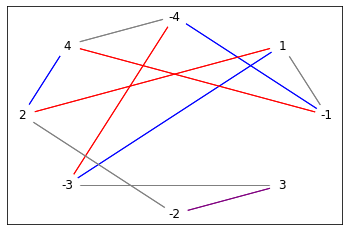

In [7]:
P4_list = [1,-2,-3,4]
P4 = pd.Series(P4_list)
P5_list = [1,3,2,-4]
P5 = pd.Series(P5_list)

G_P4_P5 = Assignment6_helper.combine(Assignment6_helper.genome_to_graph([P4]),Assignment6_helper.genome_to_graph([P5]))
Assignment6_helper.show_combined(G_P4_P5)

**Exercise 6**: Finding the number of cycles in a combined graph

For this exercise, I want you to determine the number of alternating cycles (red/blue) in the combined graph if you remove the grey links (e.g., (-1,1)).

Input: A combined breakpoint graph

Output: Number of cycles as defined in the textbook as CYCLES(P,Q).

In [8]:
ncycles = Assignment6_helper.cycles(Assignment6_helper.genome_to_graph([P4]),Assignment6_helper.genome_to_graph([P5]))
ncycles

2

**Exercise 7**: Find the number of blocks in a graph

For this exercise, blocks is defined as referenced in the textbook.

Input: G - A genome graph

Output: Number of blocks in a genome graph.

In [9]:
nblocks = Assignment6_helper.blocks(Assignment6_helper.genome_to_graph([P5]))
nblocks

4

**Exercise 7**: 2-Break Distance Problem

For this exercise, find the 2-break distance between two genomes.

Input: G - Two genomes

Output: 2-break distance

In [10]:
P6_list = [1,2,3,4,5,6]
P6 = pd.Series(P6_list)
P7_list = [1,-3,-6,-5]
P7 = pd.Series(P7_list)
P8_list = [2,-4]
P8 = pd.Series(P8_list)

distance = Assignment6_helper.two_break_distance(Assignment6_helper.genome_to_graph([P6]),Assignment6_helper.genome_to_graph([P7,P8]))
distance

3

**Exercise 8**: Check to see if a cycle alternates between red and blue

For this exercise, blocks is defined as referenced in the textbook.

Input: G - A genome graph

Output: None,None if this is not a red/blue alternating cycle otherwise return the cycle and the colors

In [11]:
import networkx as nx

G_P4_P5 = Assignment6_helper.combine(Assignment6_helper.genome_to_graph([P4]),Assignment6_helper.genome_to_graph([P5]))
# Below is an example for how you can find all the cycles
test_cycles = list(nx.simple_cycles(G_P4_P5.to_directed()))
edge_cycles = [] # just a cycle listed as edges
for cycle in test_cycles:
    edge_cycle = []
    a = cycle[0]
    for b in cycle[1:]:
        edge_cycle.append([a,b])
        a = b
    edge_cycle.append([b,cycle[0]])
    edge_cycles.append(edge_cycle)
# Running the code on all cycles
for edge_cycle in edge_cycles:
    #print(edge_cycle)
    checked_cycle, colors = Assignment6_helper.red_blue_cycle_check(G_P4_P5,edge_cycle)
    #print(colors)
    
test_edge_cycle = [[1, -3], [-3, -4], [-4, -1], [-1, 4], [4, 2], [2, 1]]
checked_cycle, colors = Assignment6_helper.red_blue_cycle_check(G_P4_P5,test_edge_cycle)
print(checked_cycle)
print(colors)

[[1, -3], [-3, -4], [-4, -1], [-1, 4], [4, 2], [2, 1]]
['blue', 'red', 'blue', 'red', 'blue', 'red']


**Exercise 9**: 2-Break Sorting Problem

Find a shortest transformation of one genome into another by 2-breaks.

Input: Two genomes with circular chromosomes on the same set of synteny blocks (i.e., the usual)

Output: The sequence of genomes resulting from applying a shortest sequence of 2-breaks transforming one genome into the other.

[1, -2, -3, 4]
[1, 2, -3, 4]
[1, 2, 3, 4]
[1, 2, -4, -3]


[{(1, -2, -3, 4)}, {(1, 2, -3, 4)}, {(1, 2, 3, 4)}, {(1, 2, -4, -3)}]

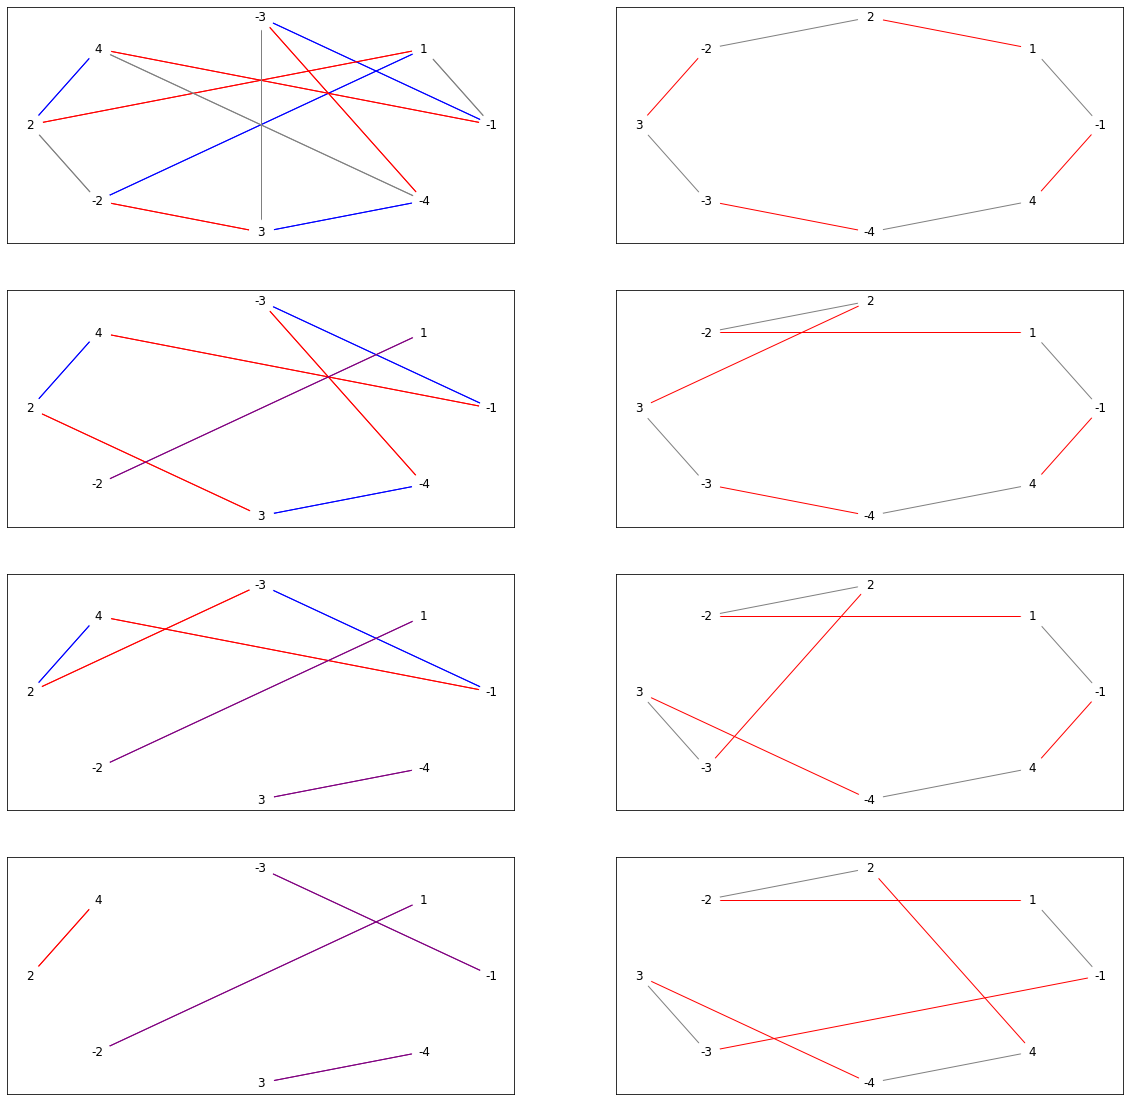

In [12]:
steps = Assignment6_helper.shortest_rearrangement_scenario([pd.Series([1,-2,-3,4])],[pd.Series([1,2,-4,-3])])
steps

In [13]:
# Don't forget to push!